In [93]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd
from astropy.units import au
from numpy.polynomial import polynomial as P

In [94]:
def load_file(path):

    data_frame = pd.read_csv(path,
                            header=0,
                            skiprows=[1, 2, 3],
                            low_memory=False)
    names = pd.read_csv(path, nrows=1,header=None).iloc[0]
    return data_frame, names

In [95]:
data_file_names = ["~/RustroverProjects/nbodyproblem/orbital_simulation_2.csv", "~/RustroverProjects/nbodyproblem/orbital_simulation_24.csv"]
data_file_a, names_a = load_file(data_file_names[0])
data_file_b, names_b = load_file(data_file_names[1])


one_au = au.to('m')
zoom = 1.5 * one_au

In [96]:
one_au = au.to('m')
zoom = 1.5 * one_au
SECONDS_PER_YEAR = 31556926


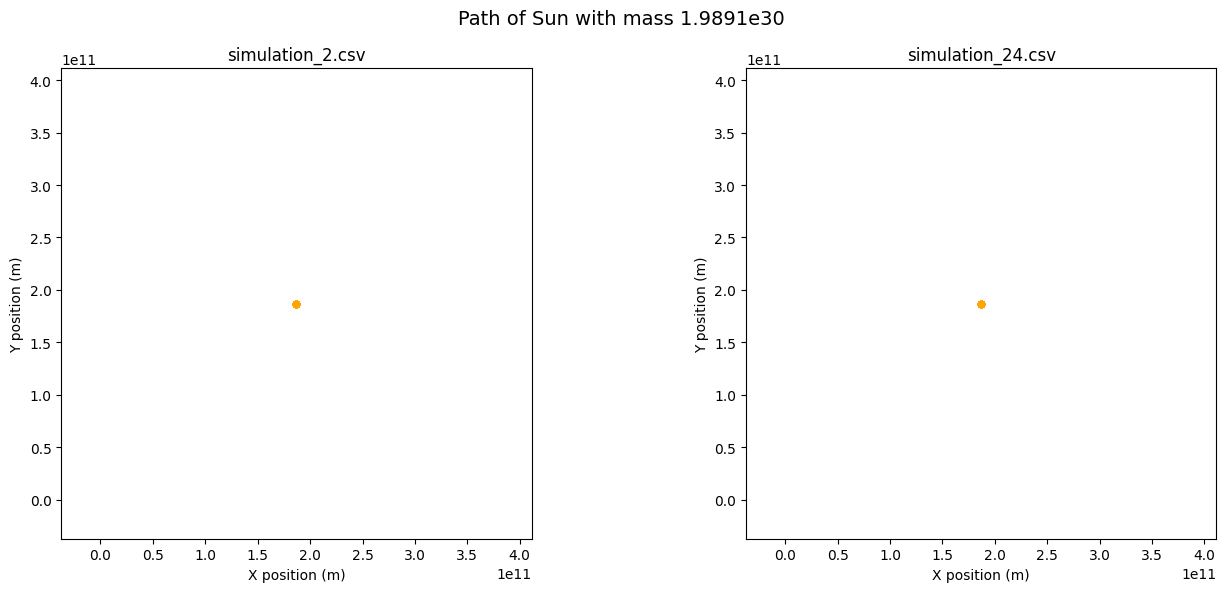

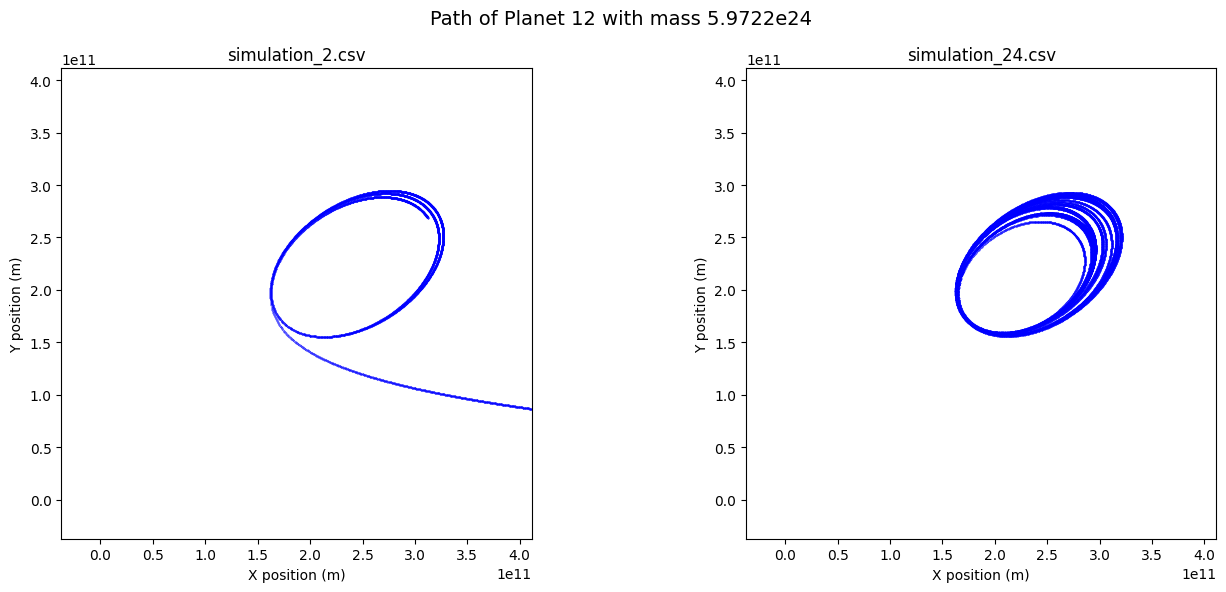

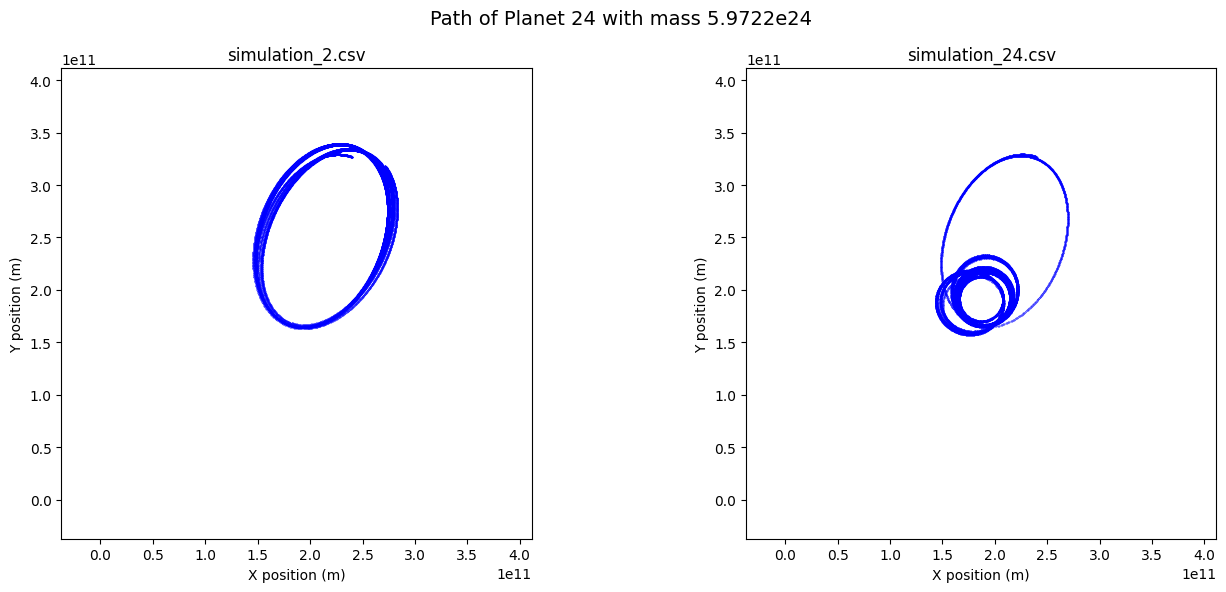

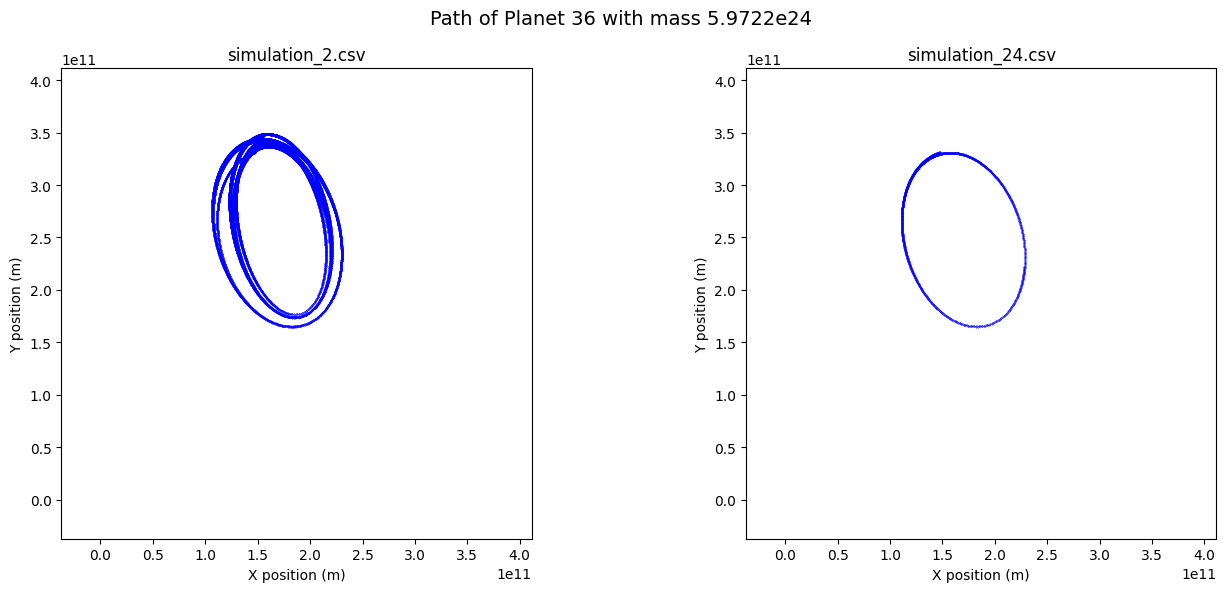

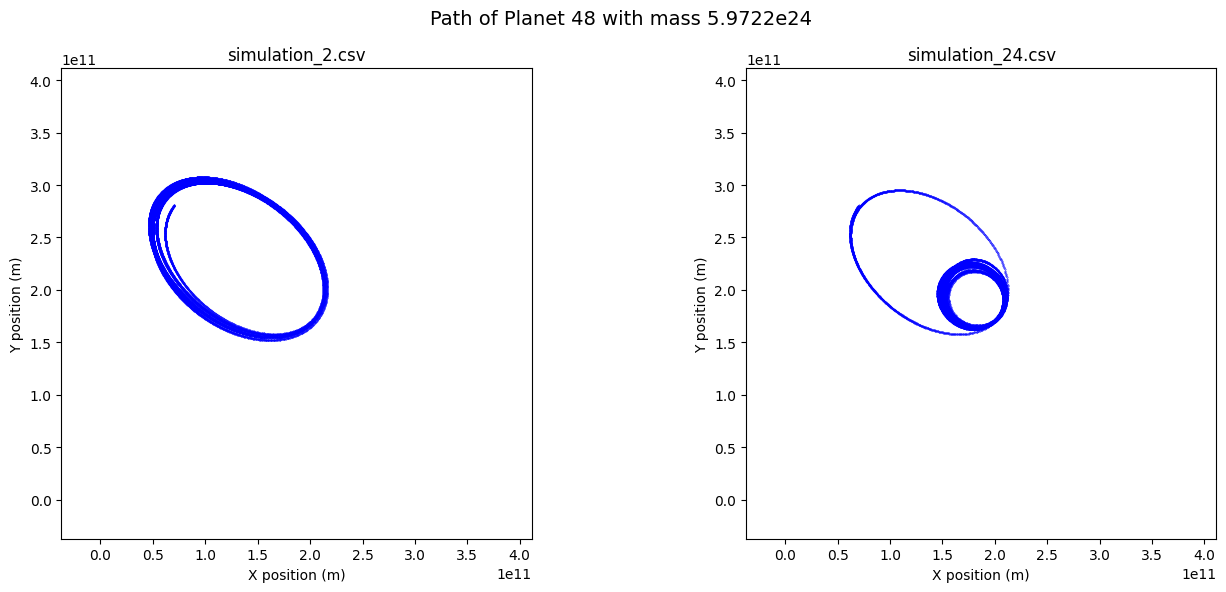

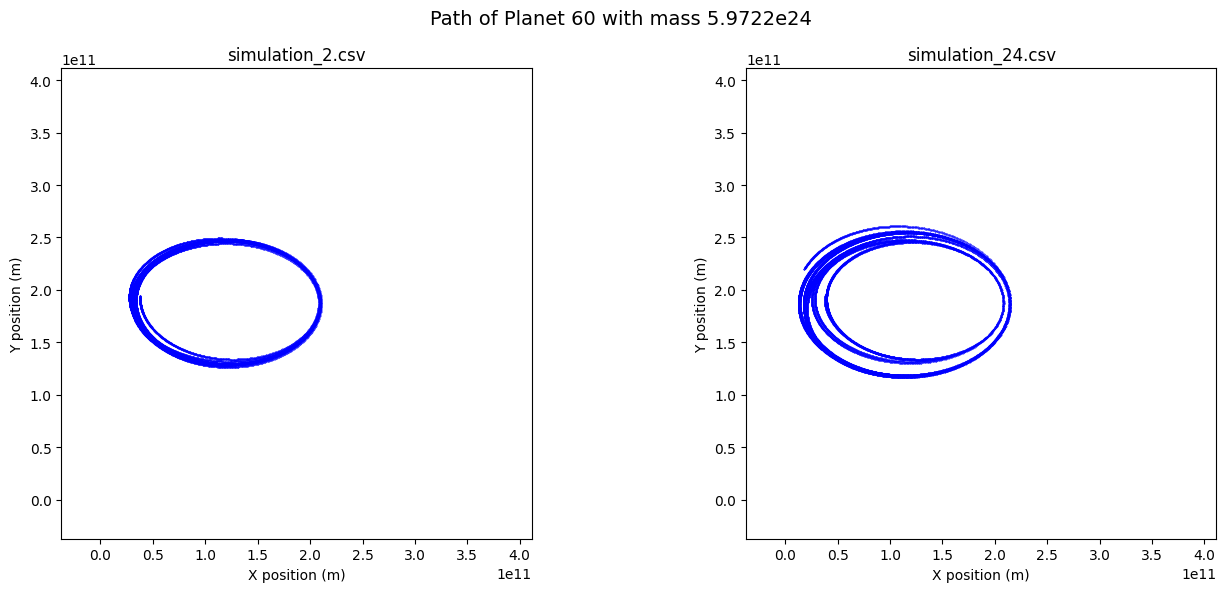

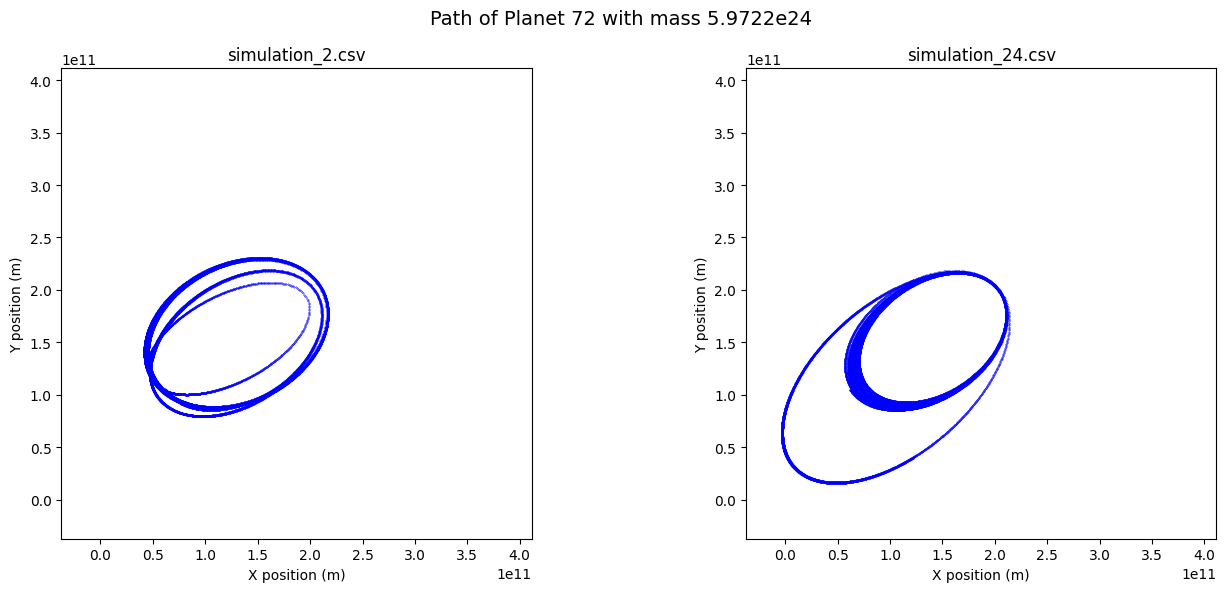

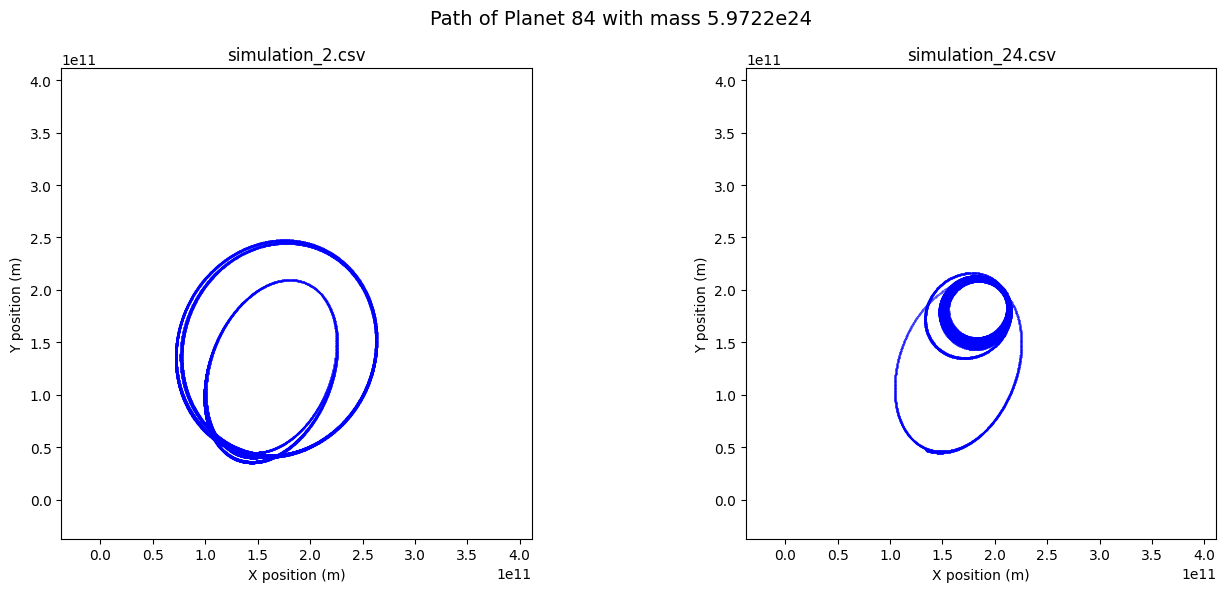

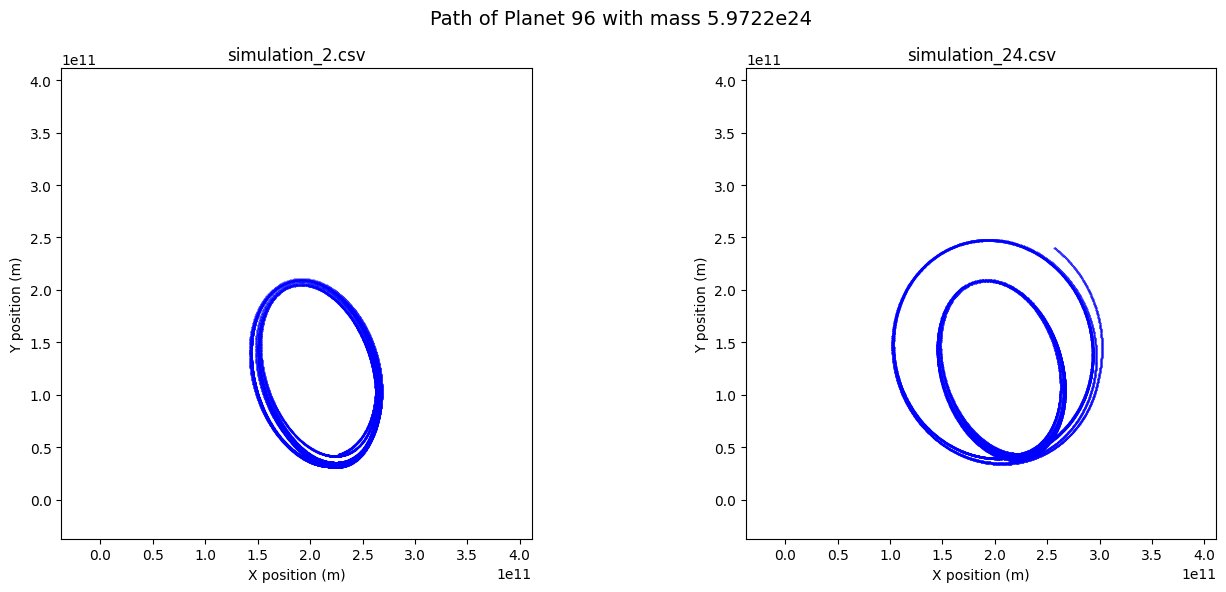

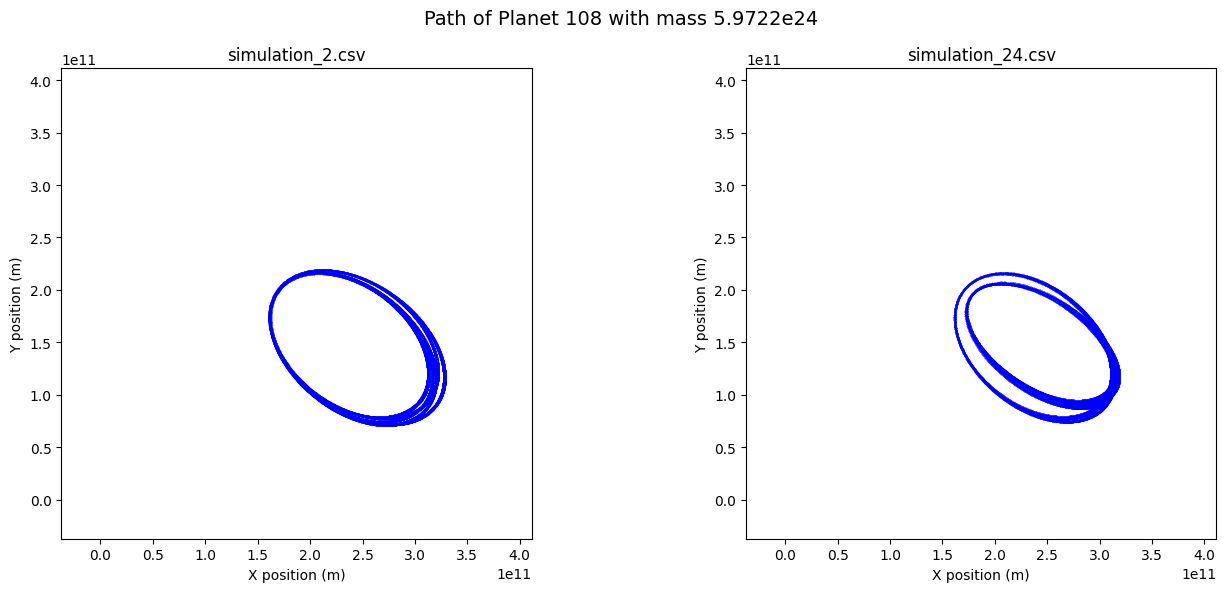

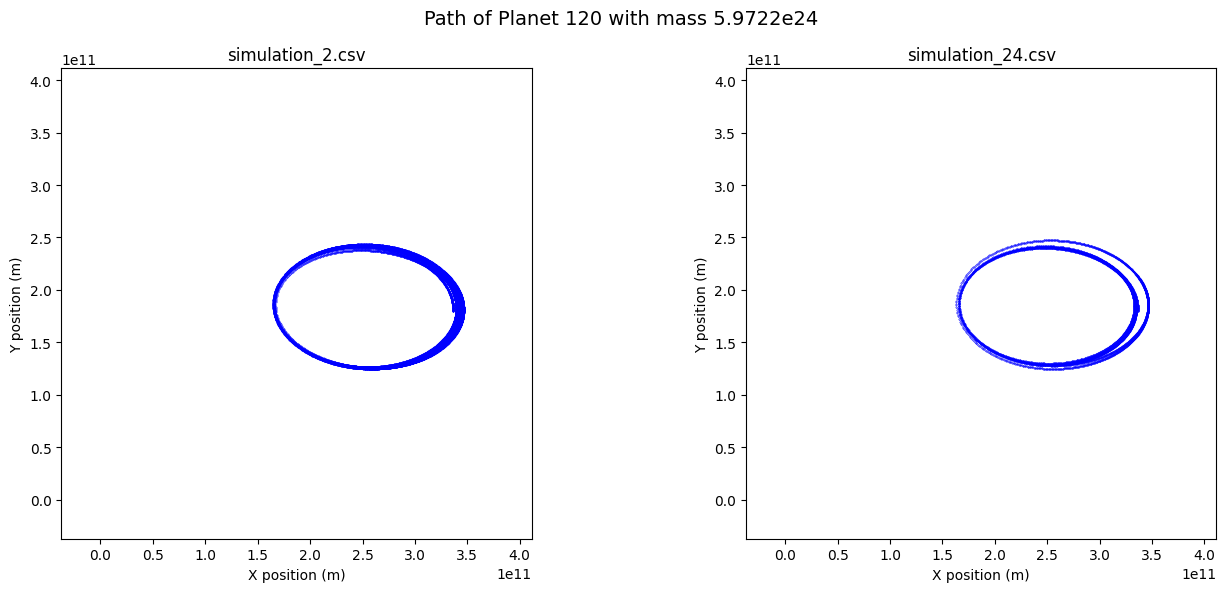

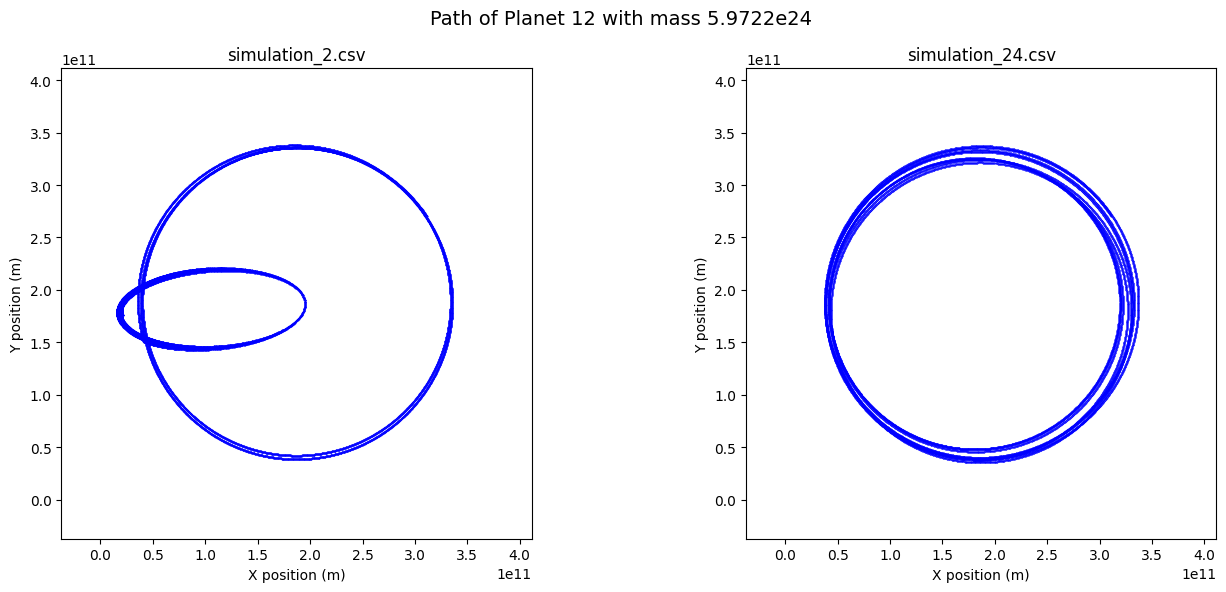

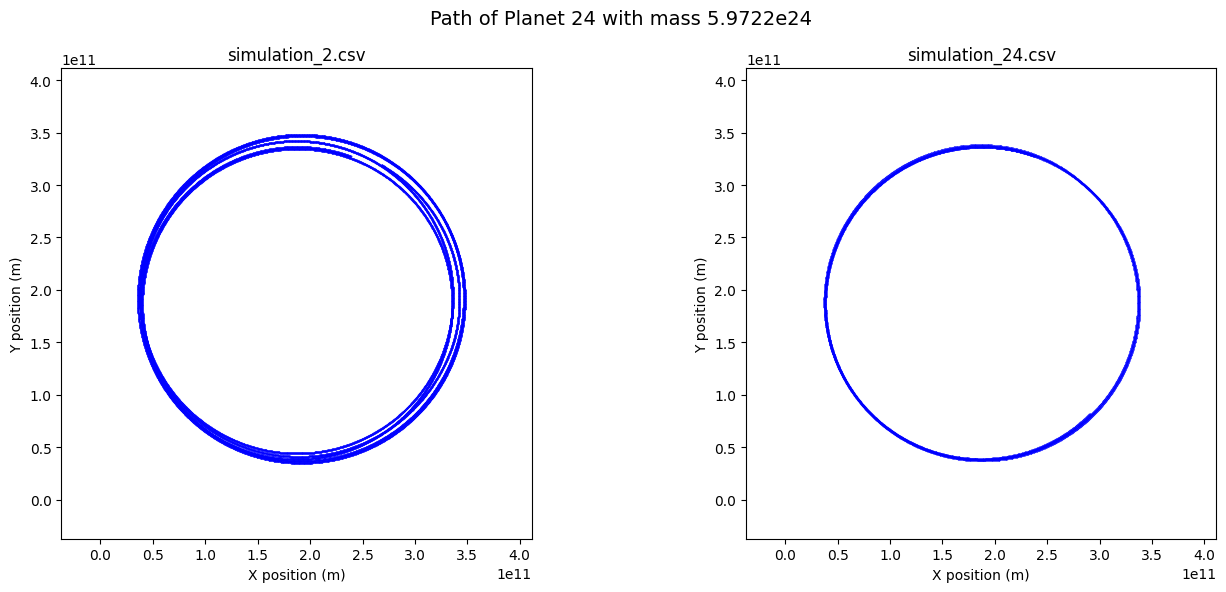

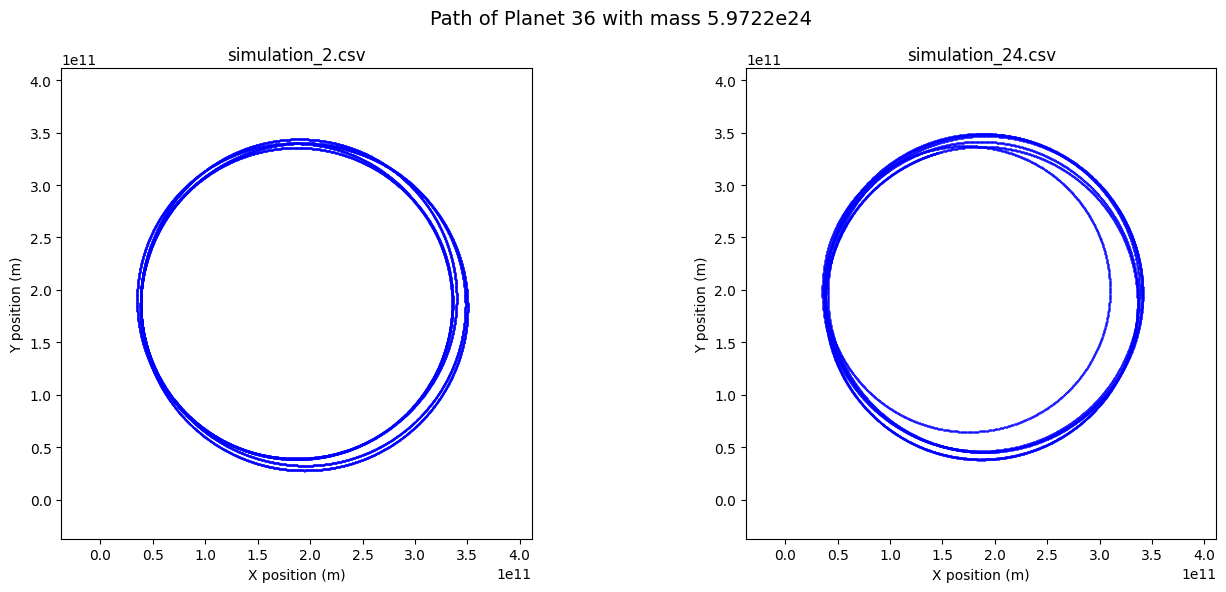

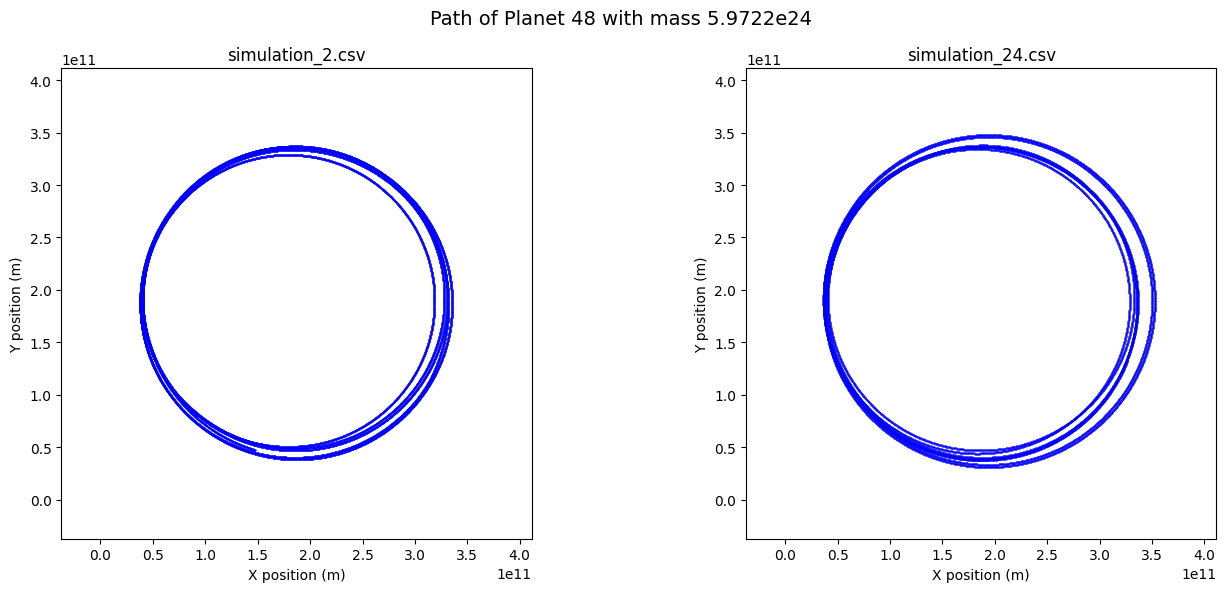

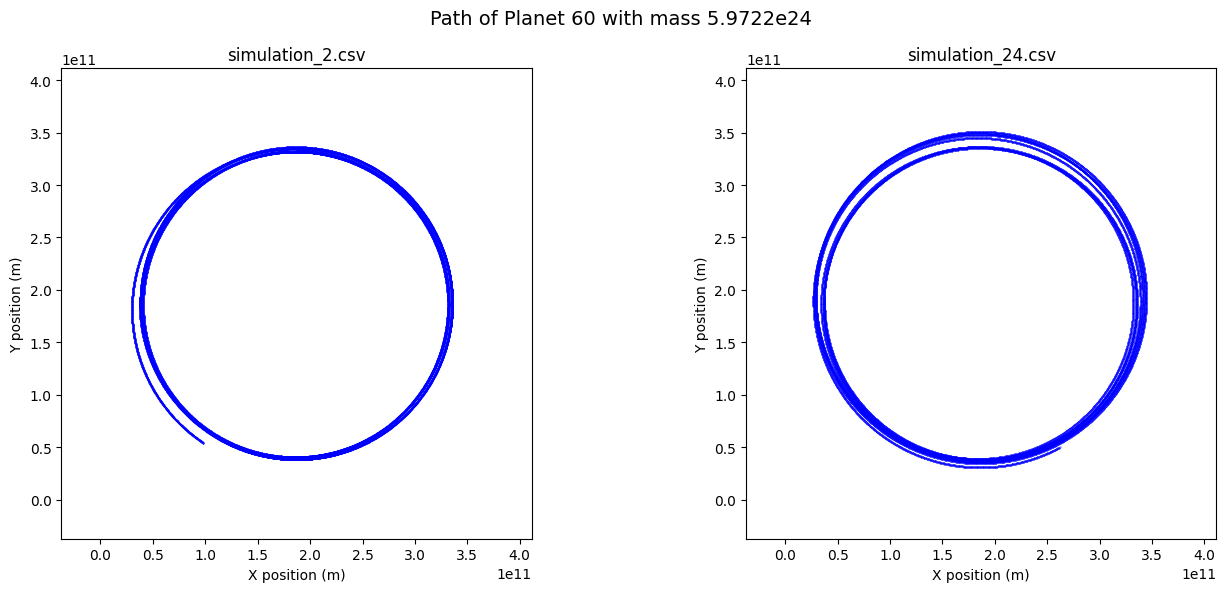

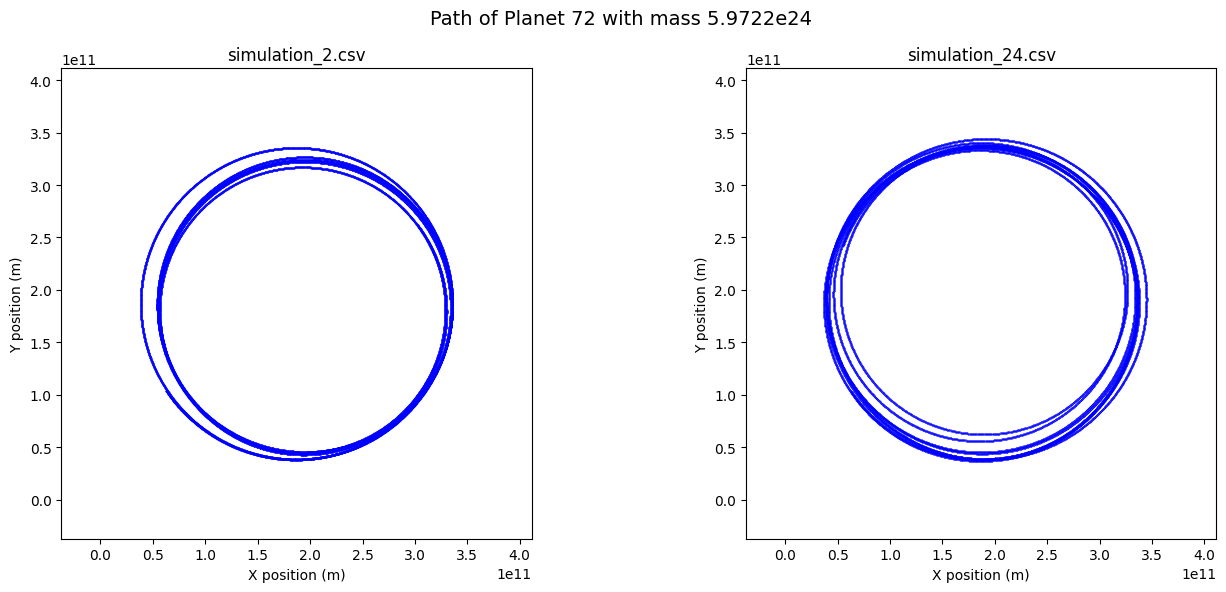

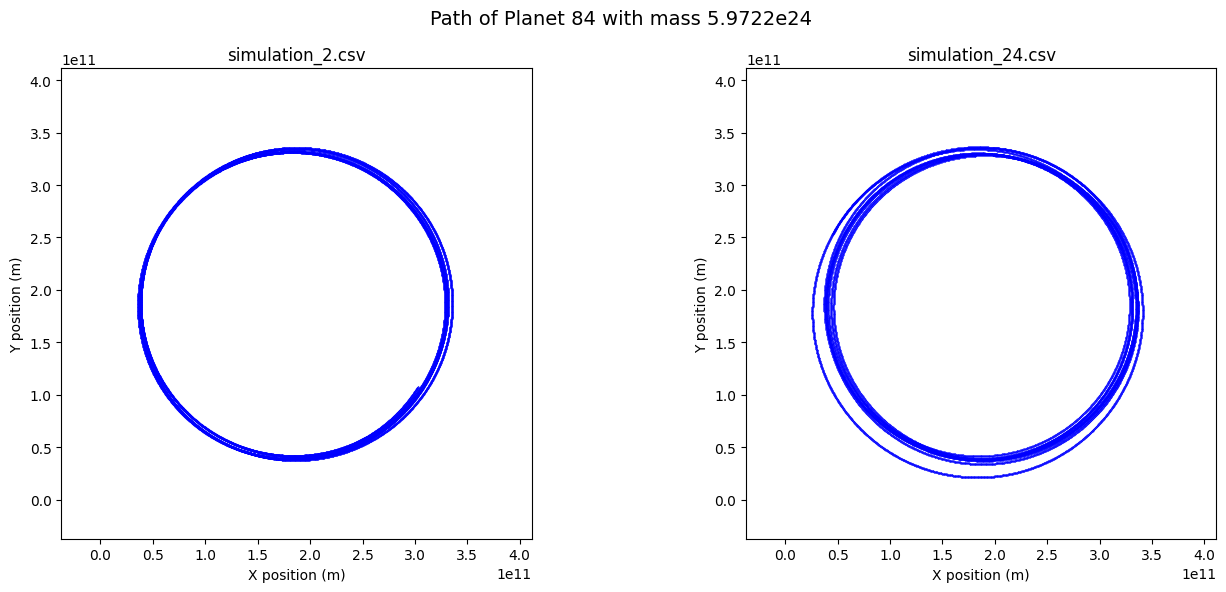

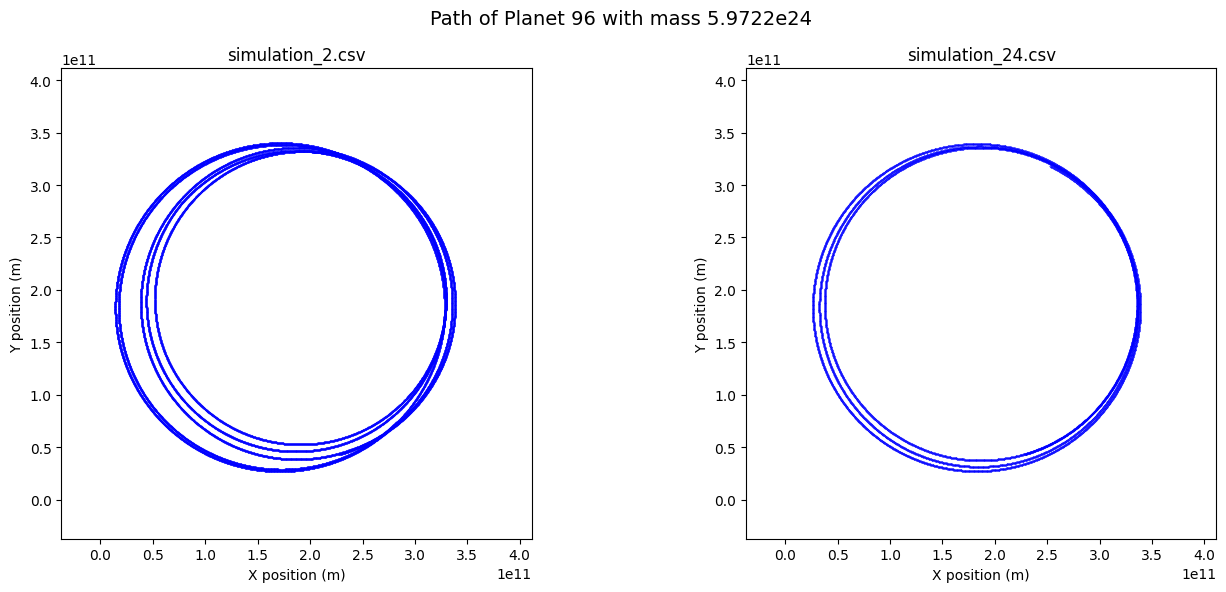

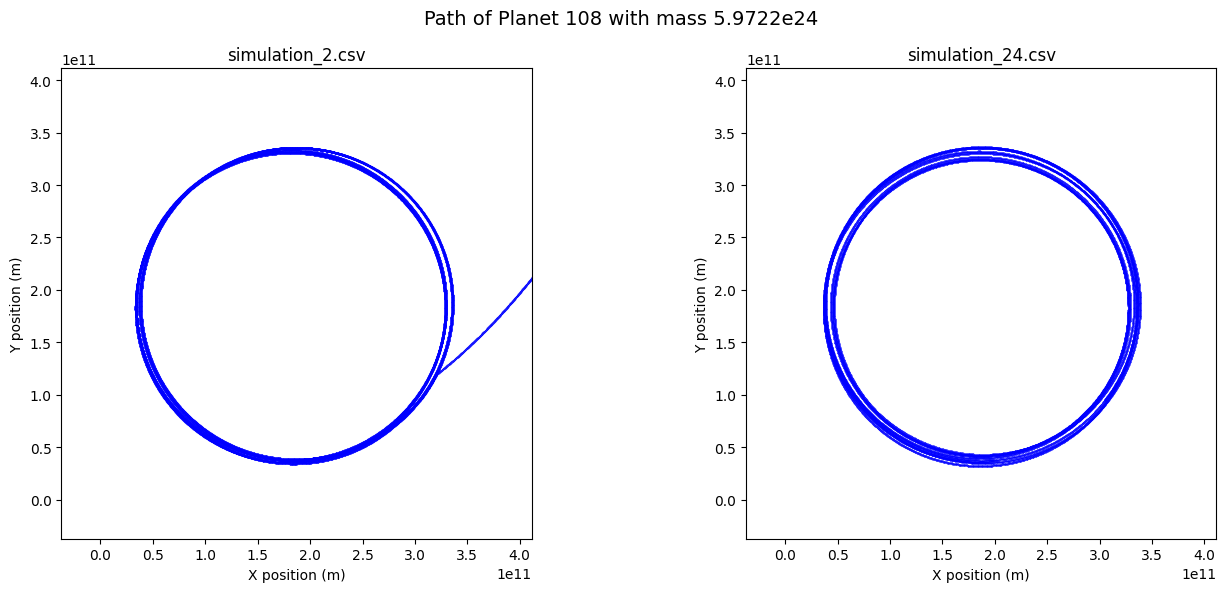

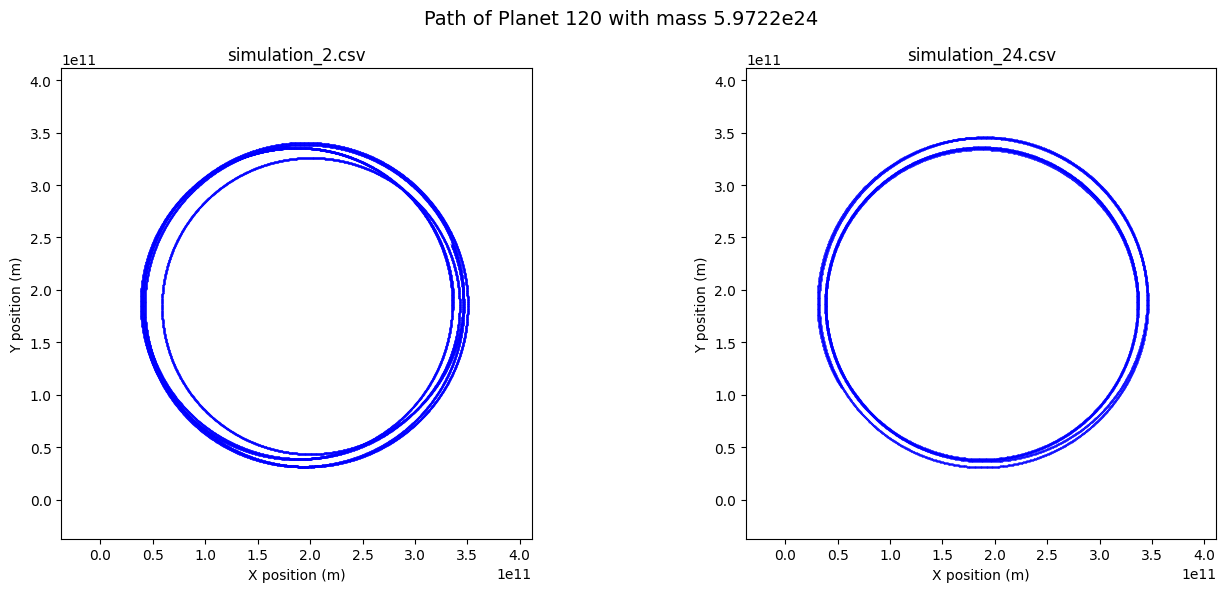

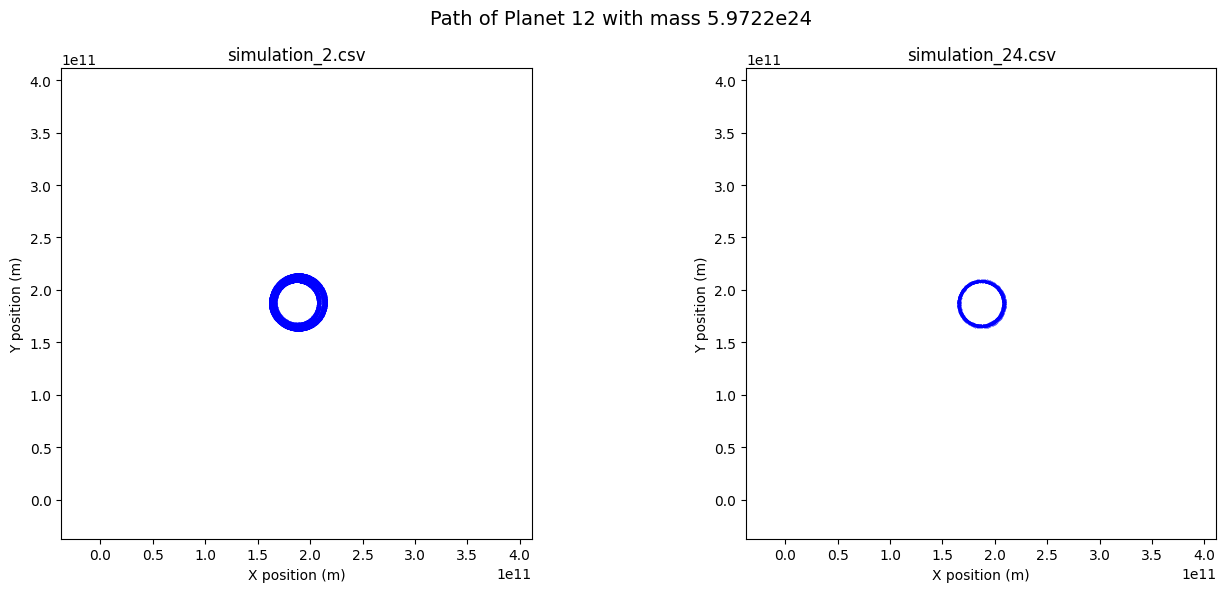

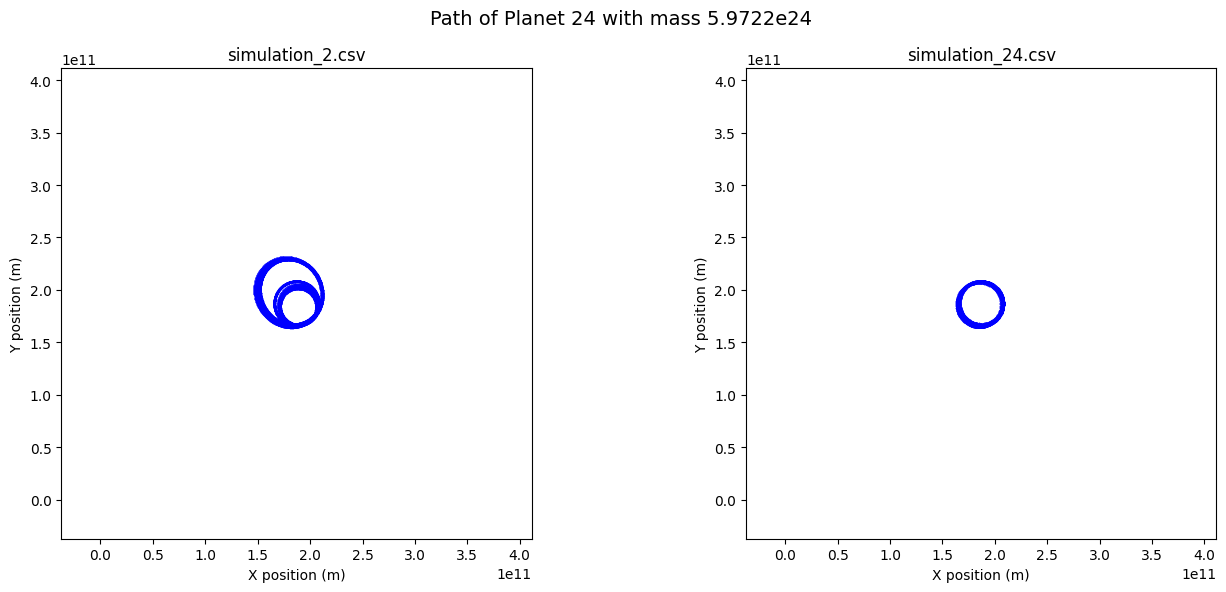

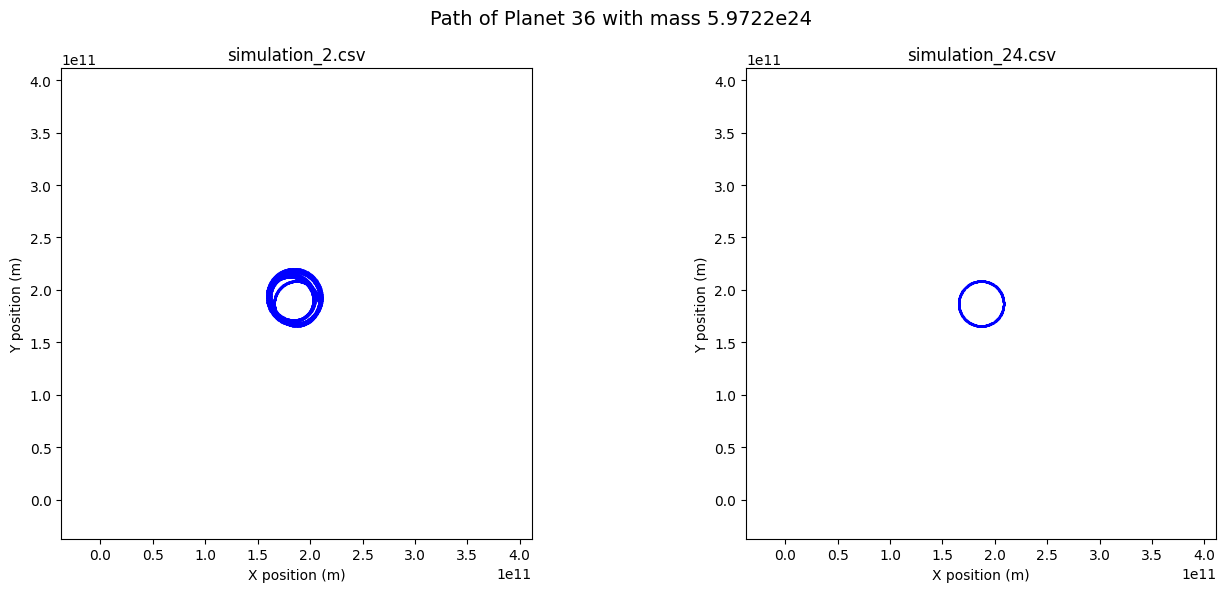

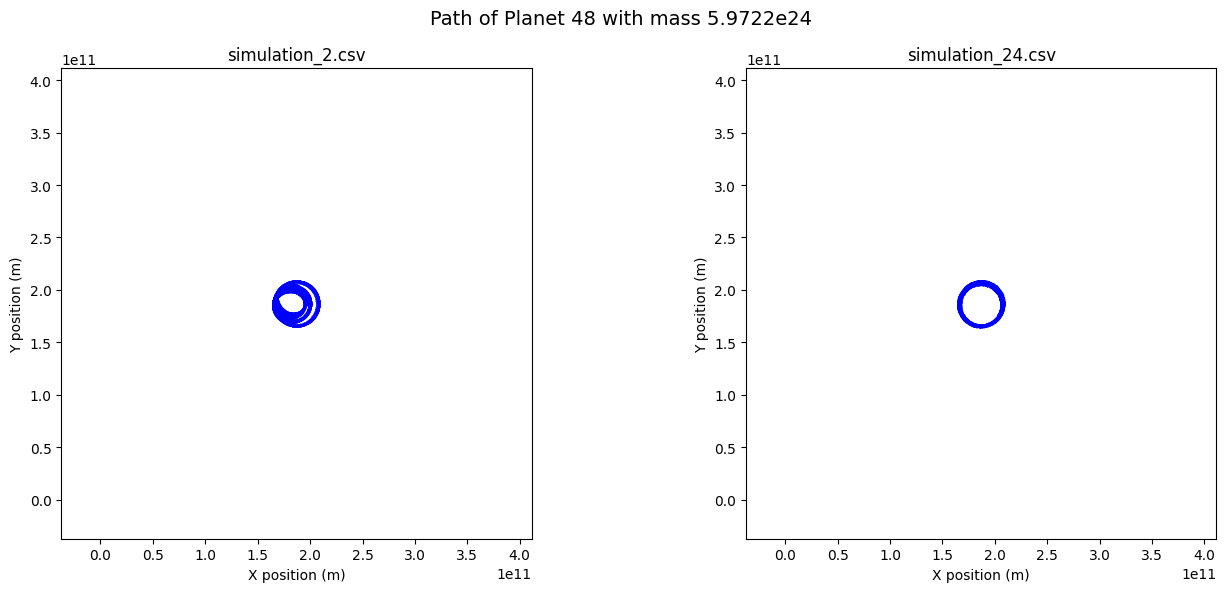

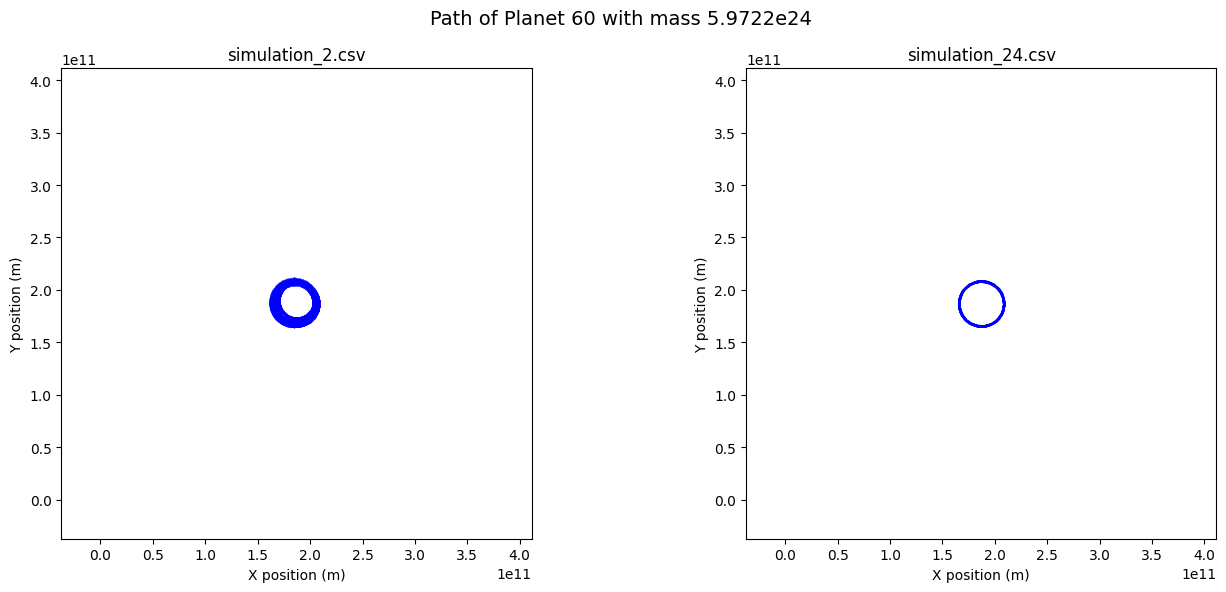

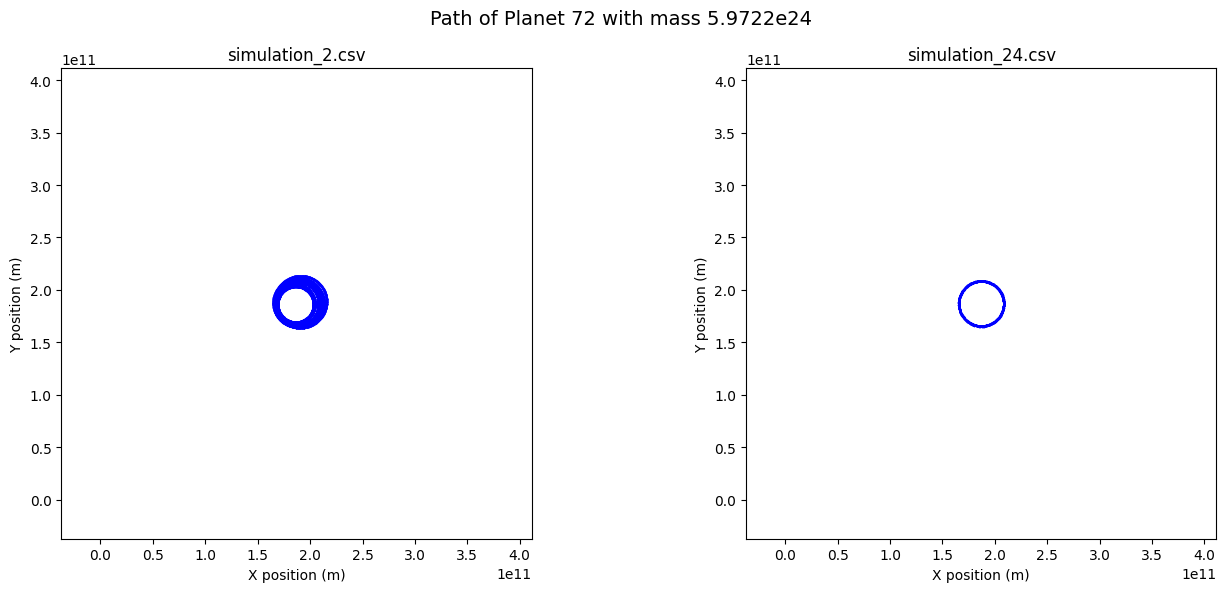

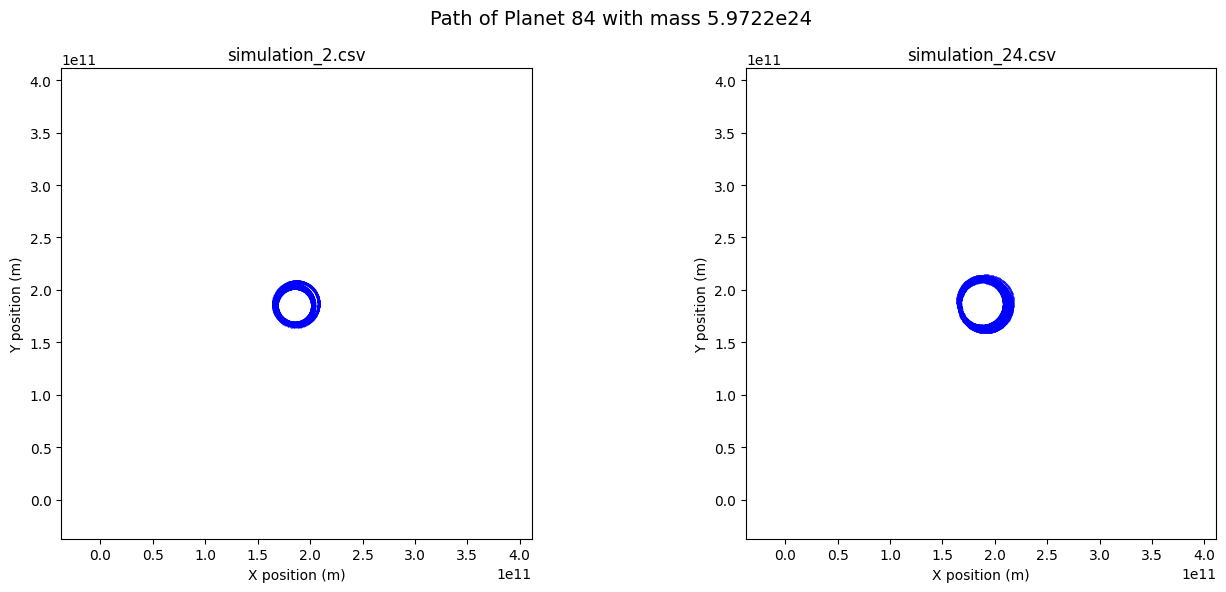

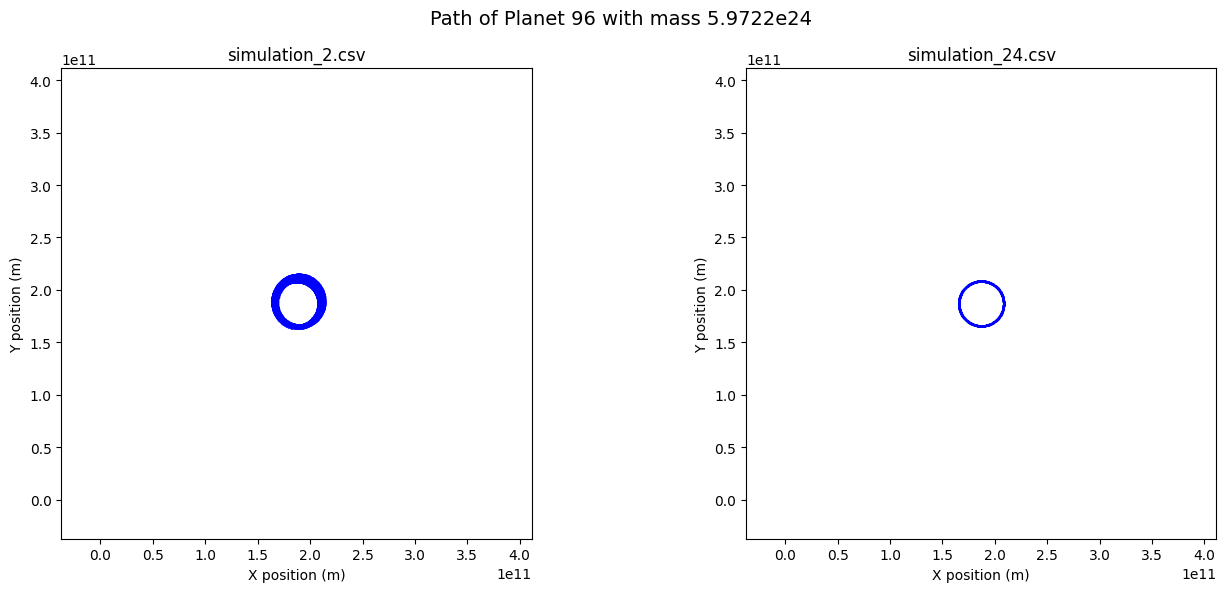

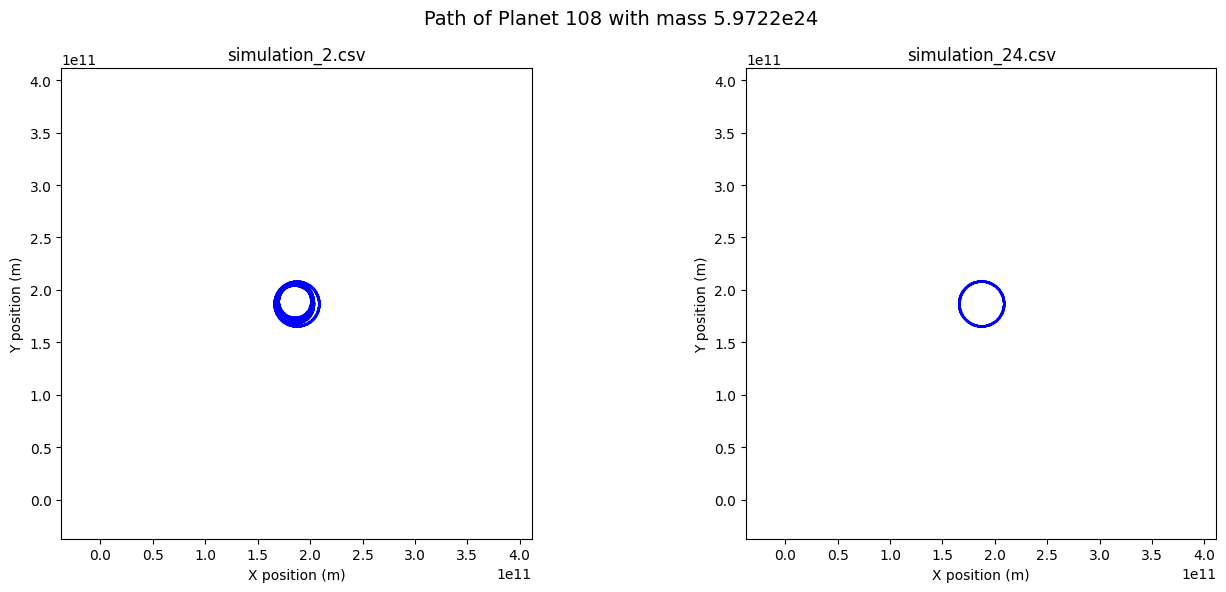

In [97]:
last_body = 360
starting_body = 0
for i in range(starting_body, last_body, 12):
    col_x = 2 * i + 4
    col_y = 2 * i + 5

    raw_name = names_a[col_x] if col_x < len(names_a) else f"Body {i}"
    label = raw_name[17:].strip() if i == 0 else raw_name[17:].strip()
    color = "orange" if i == 0 else "blue"

    center_x = data_file_a.iloc[3, 4]
    center_y = data_file_a.iloc[3, 5]

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    fig.suptitle(f"Path of {label}", fontsize=14)
    size = 20 if i == 0 else 0.1

    for ax, data_file, file_label in zip(axes, [data_file_a, data_file_b], data_file_names):
        pos_x = data_file.iloc[:, col_x]
        pos_y = data_file.iloc[:, col_y]
        ax.scatter(pos_x, pos_y, s=size, color=color)
        ax.set_xlim(center_x - zoom, center_x + zoom)
        ax.set_ylim(center_y - zoom, center_y + zoom)
        ax.set_title(file_label[41:])
        ax.set_xlabel("X position (m)")
        ax.set_ylabel("Y position (m)")
        ax.set_aspect("equal")

    plt.tight_layout()
    plt.show()


In [98]:
def energy_reader(data_file): 
    kinetic_energy = pd.to_numeric(data_file.iloc[:, 1], errors='coerce')
    potential_energy = pd.to_numeric(data_file.iloc[:, 2], errors='coerce')
    total_energy = pd.to_numeric(data_file.iloc[:, 3], errors='coerce')
    time = pd.to_numeric(data_file.iloc[:, 0], errors='coerce')
    
    energy_data = pd.DataFrame({'time': time, 'ke': kinetic_energy, 'pe': potential_energy, 'total': total_energy})
    energy_data = energy_data.dropna(subset=['time'])
    time_years = energy_data['time'] / SECONDS_PER_YEAR
    return energy_data, time_years

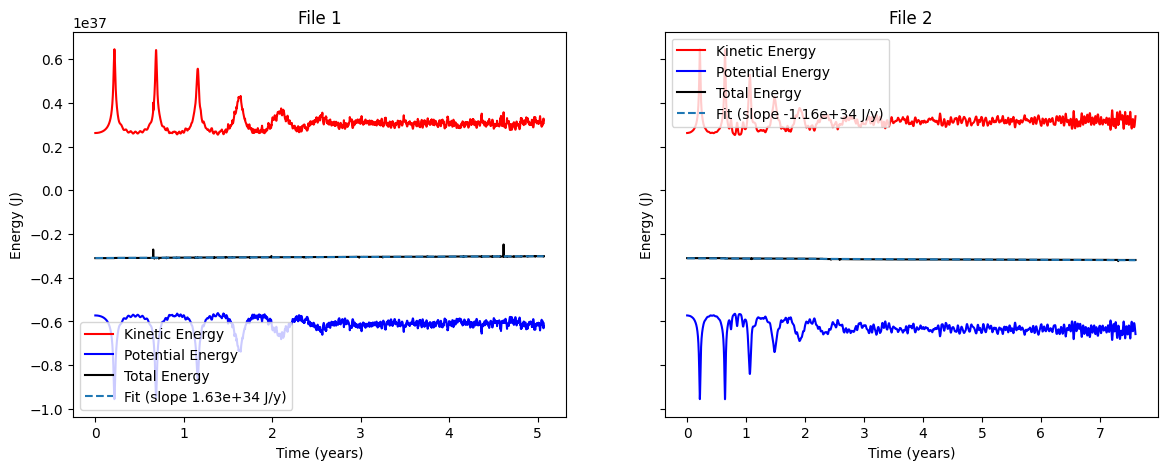

In [99]:
energy_a_df, tima_a = energy_reader(data_file_a)
energy_b_df, tima_b = energy_reader(data_file_b)

fig, data_graph = plt.subplots(1, 2, figsize=(14, 5), sharey=True)



for data_graph, energy_data_df, label in zip(data_graph, [energy_a_df, energy_b_df], ["File 1", "File 2"]):
    t_years = energy_data_df['time'] / SECONDS_PER_YEAR
    coeffs = np.polyfit(energy_data_df['time'], energy_data_df['total'], 1)
    trendline = np.polyval(coeffs, energy_data_df['time'])
    slope_per_year = coeffs[0] * SECONDS_PER_YEAR

    data_graph.plot(t_years, energy_data_df['ke'],    label="Kinetic Energy",   color='red')
    data_graph.plot(t_years, energy_data_df['pe'],    label="Potential Energy",  color='blue')
    data_graph.plot(t_years, energy_data_df['total'], label="Total Energy",      color='black')
    data_graph.plot(t_years, trendline,   label=f"Fit (slope {slope_per_year:.2e} J/y)", linestyle='--')
    data_graph.set_title(label)
    data_graph.set_xlabel("Time (years)")
    data_graph.set_ylabel("Energy (J)")
    data_graph.legend()

plt.legend()
plt.show()


